## EPITA International Programs Department<br>Academic Year: 2021<br>AI in signal and audio processing course

# <center> <br><br>PRACTICAL WORK: SESSION 1<br>AUDIO AND SPEECH ENCODING<br></center>

# Introduction

Many  auditory  stimuli,  including  those  drawn  from  speech,  music  and  nature,  are  complex  and  high dimensional.  Learning  features  from  such  signals,  which  often  have  structure  at  many  timescales,  hasproven to be challenging.  A number of sparse coding models have achieved impressive success in learning relatively  shallow  features. Let's present them in this notebook, starting defining a signal and its properties.

In [6]:

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%matplotlib inline

import os
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()
plt.rcParams['figure.figsize'] = (13, 5)


## Goals

1. Reminding of concepts related to sound propagation, capture and digitalization.
2. Visualizing and audio digital signal with Python. 
<br><br>
3. Reviewing basic signal processing tools and concepts.
4. Indetifying and visualizing artifacts of an audio signal.
<br><br>
4. Encoding an audio signal - basic audio features.
5. Application (1): voice activation detection.
6. Application (2): onset detection. 
7. Application (3): source characterization.

<br>

# Step 1: Physics of sound

### About sound waves physics

Here are the concepts to you will need to understand: <br>
- longitudinal wave propagation in air (speed, magnitude, wavelength, frequency, energy)
- conversion of pressure measurement from Pascals (Pa) to Decibels (dB). 
- waves superposition
- reflection, absorption, transmittance
- propagation modes
- acoustic resonance

### About sound capture and digital conversion

Conversion of air pressure variations to an electrical signal using a microphone. <br><br>
Conversion of an electrical signal to a digital signal (with an ADC Analog-to-Digital-Converter): <br>
- signal sampling
- signal encoding in a raw digital format (with definite bit depth)
- signal buffering
- signal converted to an audio file (in a compressed or uncomrpessed format) 

### About sound listening

Here is an explanation of the basic principles of human ear listening process:<br>
https://upload.wikimedia.org/wikipedia/commons/transcoded/7/72/Journey_of_Sound_to_the_Brain.ogv/Journey_of_Sound_to_the_Brain.ogv.720p.vp9.webm

<br>

# Step 2: Visualizing an audio digital signal using Python

Digital audio is a representation of sound recorded in, or converted into, digital form. In digital audio, the sound wave of the audio signal is typically encoded as numerical samples in a continuous sequence. For example, in CD audio, samples are taken 44,100 times per second, each with 16-bit sample depth, or in radio telecomunications, samples are taken 16,000 times per second, each with 16 bits sample depth. 
<br>
Digital audio as a waveform is a compact and redundant representation of meaningful information. Several other representations, in the time-frequency domain or using pre-defined model, can drastically improve its processing.
We will see here some of those representations.

### Plotting the audio waveform

The time-dependant electrical signal x(t) was sampled into a digital signal x[n] by the ADC (with a definite sampling rate and bith depth):

$$ x[n] = \left. x(t) \right|_{t=n} \quad \quad \textrm{for} \quad 0 \le n \lt N $$

Let's download an audio file:

In [115]:
import urllib
filename = os.path.join(os.getcwd(),r'audio',r'c_strum.wav')
guitar_chord, sampling_rate = librosa.core.load(filename)

In [116]:
ipd.Audio(guitar_chord,rate=sampling_rate)

<div class="alert alert-block alert-info">
         <font size="0.75"> <b>Note:</b> To be able to analyze and play the audio signal, we need to know at which rate it was sampled. The sampling rate is given by the audio file header, among other information (as title, artist, creation date...). <br> We don't need to retrieve the bit depth here, as the output values (of librosa.load) are in [-1, 1].  </font>
</div>

Listen to the audio file:

Plot the wavefile as a 1-dimensional signal:

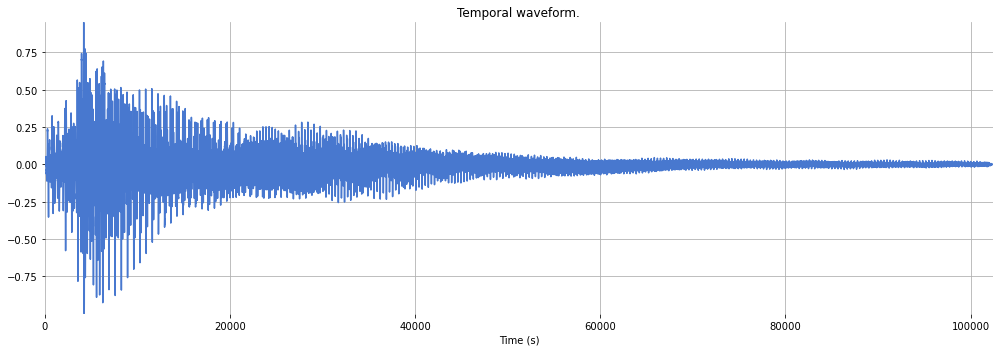

In [117]:
# Plot wavefile using librosa.display.waveplot.
plt.figure(figsize=(14, 5))
plt.plot(guitar_chord)
###
plt.title('Temporal waveform.')
plt.xlabel('Time (s)')
plt.tight_layout()

<br>

# Step 3: Reviewing basic signal processing tools and concepts

### Fourier transform

The *Fourier Transform* ([Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform)) is one of the most fundamental operations in applied mathematics and signal processing.

It transforms our time-domain signal into the *frequency domain*. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a *superposition of sinusoids* of varying magnitudes, frequencies, and phase offsets.

Here is its formal definition ($x$ a signal, with $N$ samples):
$$ X[k] = \sum_{n=1}^N x[n] \cdot  e^{-\frac{2 i \pi k}{N}} \quad \quad  \text{with} \quad   0 \le k \lt N$$

To compute a Fourier transform in NumPy or SciPy, and its magnitude, use [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) and [`numpy.absolute`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html):

In [118]:
import scipy as sp
import numpy as np
# Compute guitar_chord fft, using scipy.fft.fft() and numpy.absolute().
### Write code here.###
GUITAR_CHORD_FFT =sp.fft.fft(guitar_chord,norm="forward")
GUITAR_CHORD_FFT_MAG = np.minimum(100*np.abs(GUITAR_CHORD_FFT),1)
###
freqs = numpy.linspace(0, sampling_rate, len(GUITAR_CHORD_FFT_MAG)) # frequency variable

<div class="alert alert-block alert-info">
     <font size="0.75"> <b>Note:</b> We have computed here the "discrete Fourier transform" (DFT) of the input signal. It is the discrete version of (continuous) Fourier transform.<br> 
         The "fast Fourier transform algorithm" (FFT) is usually considered to compute a DFT.</font>
</div>

### Magnitude anf phase of FT

As a complex signal, $X(k)$ can be expressed with its polar coordinates:
<br>
$$ X(k) = \left| X(k) \right| \cdot e^{i \theta(k)} \quad \quad  
\begin{array}
\textrm{with} & 0 \le k \lt N  \quad \quad \quad \quad \quad \\
\textrm{and} & \begin{cases}
\left| X \right| \text{ : }& \text{magnitude of } X \\
\theta \text{ : }& \text{phase of } X
\end{cases}
\end{array}$$
<br>
Let's plot the magnitude of the Fourier transform of <code>guitar_chord</code>:

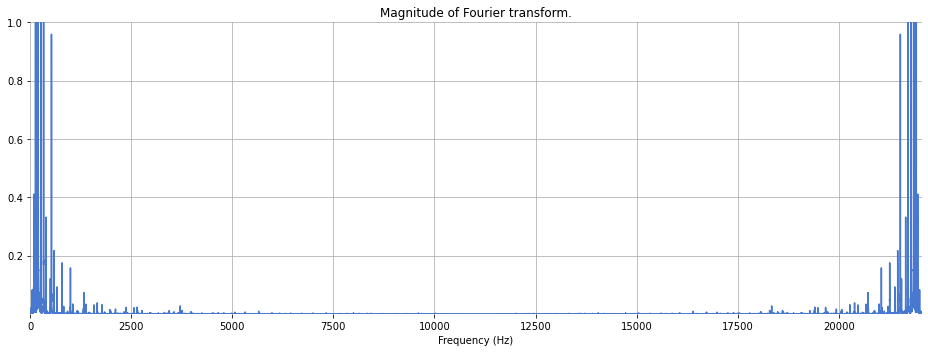

In [119]:
plt.figure(figsize=(13, 5))
plt.plot(freqs, GUITAR_CHORD_FFT_MAG)
plt.title('Magnitude of Fourier transform.')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

<div class="alert alert-block alert-info">
    <font size="0.75"> <b>Note:</b> The magnitude of the Fourier transform is also called "spectrum". It is usually express in decibel (dB).</font>
</div>

### Power spectral density

Zoom in:
<br>
[`Log power spectral density`](https://en.wikipedia.org/wiki/Spectral_density) 
<br>
$$ PSD_{dB} (x) = 10 \cdot log_{10} \left| X \right|^2 $$

In [120]:
# Compute guitar_chord spectrum in dB using numpy.log10()
### Write code here.###
GUITAR_CHORD_FFT_MAG_DB = 10 * 2 * np.log10(np.abs(GUITAR_CHORD_FFT))
###

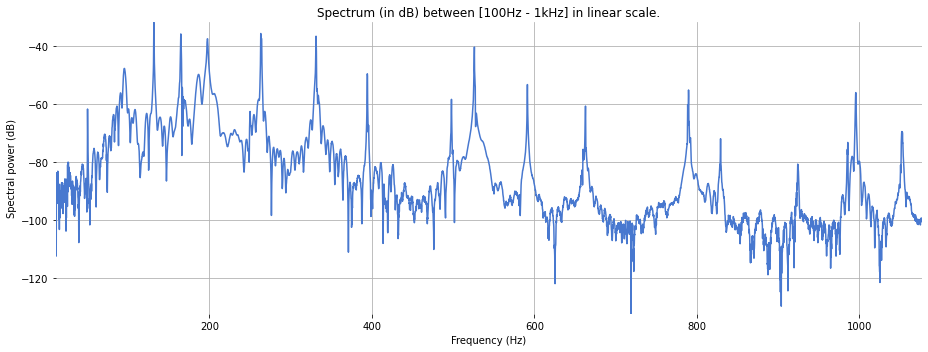

In [121]:
plt.figure(figsize=(13, 5))
plt.plot(freqs[50:5000], GUITAR_CHORD_FFT_MAG_DB[50:5000])
plt.title('Spectrum (in dB) between [100Hz - 1kHz] in linear scale.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral power (dB)')
plt.tight_layout()

Plotting the log-power spectral density using a log-scale x-axis (instead of a linear-scale).

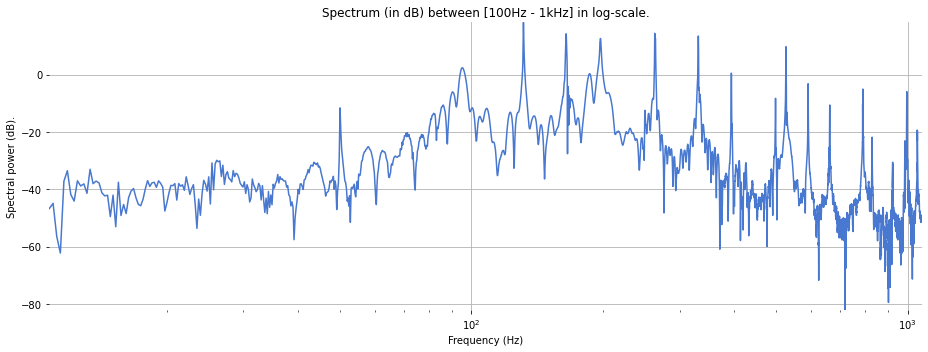

In [81]:
plt.figure(figsize=(13, 5))
plt.plot(freqs[50:5000], GUITAR_CHORD_FFT_MAG_DB[50:5000])
plt.xscale('log')
plt.title('Spectrum (in dB) between [100Hz - 1kHz] in log-scale.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral power (dB).')
plt.tight_layout()

### Short-Time Fourier Transform

The <a href="https://en.wikipedia.org/wiki/Short-time_Fourier_transform" target="_blank">Short-time Fourier transform</a> (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time. In practice, the procedure for computing STFTs is to divide a longer time signal into shorter segments of equal length and then compute the Fourier transform separately on each shorter segment.

$$ X(m,k) = \frac{1}{N} \sum_{n=1}^{N} {x[n] \cdot w[n-m] e^{-\frac{i k n}{2 \pi}}}$$

[`librosa.stft`](https://librosa.github.io/librosa/generated/librosa.core.stft.html#librosa.core.stft) computes a STFT. We provide it a frame size, i.e. the size of the FFT, and a hop length, i.e. the frame increment:

In [123]:
hop_length = 128
n_fft = 512
y=guitar_chord
### Write code here.###
GUITAR_CHORD_STFT = (y, n_fft, hop_length)
###

To convert the hop length and frame size to units of seconds:

In [124]:
hop_length_s = float(hop_length)/sampling_rate # units of seconds
print(f'Each frame is computed every {1000*hop_length_s} ms.')
nfft_s = float(n_fft)/sampling_rate  # units of seconds
print(f'Each frame has a {1000*nfft_s} ms length.')

Each frame is computed every 5.804988662131519 ms.
Each frame has a 23.219954648526077 ms length.


For real-valued signals, the Fourier transform is symmetric about the midpoint. Therefore, `librosa.stft` only retains one half of the output:

In [125]:
GUITAR_CHORD_STFT

(array([-3.0517578e-05, -3.0517578e-05, -9.1552734e-05, ...,
         0.0000000e+00, -3.0517578e-05,  3.0517578e-05], dtype=float32),
 512,
 128)

This STFT has 257 frequency bins and 801 frames in time.

### Spectrogram

The **spectrogram** ([Wikipedia](https://en.wikipedia.org/wiki/Spectrogram); FMP, p. 29, 55) shows the the intensity of frequencies over time. A spectrogram is simply the squared magnitude of the STFT:

$$ S(m, \omega) = \left| X(m, \omega) \right|^2 $$

In speech and music processing, we often only care about the spectral magnitude and not the phase content.

In [106]:
### Write code here.###
GUITAR_CHORD_STFT_MAG = np.abs(GUITAR_CHORD_STFT)
###

/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_8156/3002399694.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GUITAR_CHORD_STFT_MAG = np.abs(GUITAR_CHORD_STFT)


To display any type of spectrogram in librosa, use librosa.display.specshow.

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

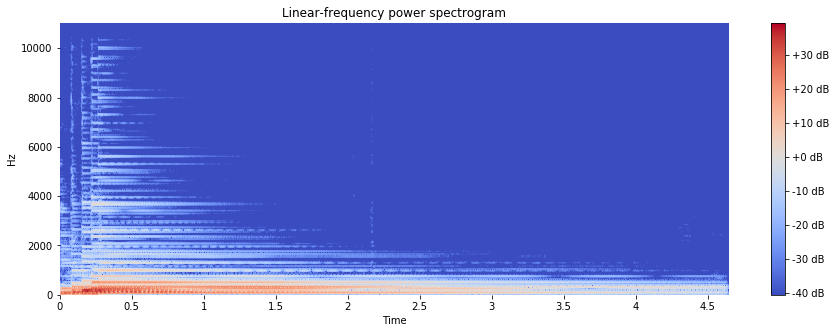

In [20]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(GUITAR_CHORD_STFT_MAG, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

### Phase analysis

In [ ]:
hop_length = 32
n_fft = 512

### Write code here.###
P = 
###

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(P, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(ticks=[-3,0,3])
plt.title('Phase')

### Instantaneous frequency

In [ ]:
### Write code here.###
DP = 
##

In [ ]:
DP3 = P3[1:,:]-P3[0:-1,:]
plt.figure(figsize=(15, 5))
librosa.display.specshow(DP, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(ticks=[-3,0,3])
plt.title('Instantaneous frequency')

### The "time-frequency paradox"

In [ ]:
hop_length = 8
n_fft = 128
print(n_fft/sr)

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram (STFT win:8ms)')

In [ ]:
hop_length = 256
n_fft = 2048
print(n_fft/sr)

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram (STFT win:128ms)')

<br>

# Step 4: Indetifying and visualizing artifacts of an audio signal

### Signal sampling rate and resolution

Resample the signal at 8kHz and reduce bitdepth to 8 bits.
Using Librosa.resample.

In [ ]:
### Write code here.###

###

### Signal possible artifacts

### Noise

In [ ]:
loaded_data, loaded_sr = librosa.load('audio_data_used/Pinknoise_16kHz.wav')
sr = 16000
noise = librosa.resample(loaded_data, loaded_sr, sr)
ipd.Audio(noise, rate=sr)

### Dynamic and volume balance

Measure maximum peak level and RMS energy of overall signal

In [ ]:
### Write code here.###

###

### Spectral balance and amplitude distortion (linear)

### Phase distortion (linear)

### Clipping and non-linear distortion

Simulate clipping on a signal and plot corresponding STFT

In [ ]:
### Write code here.###

###

<br>

# Step 5: Encoding an audio signal - basic audio features.

### Fourier vs wavelet spectrogram

**Fourier transform** (STFT)<br>
Spectrum with  frequency log-scale

In [ ]:
hop_length = 64
plt.figure(figsize=(15, 5))
librosa.display.specshow(, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
print(S2.shape)

**Wavelet transform: constant Q-transform** (short-time CQT) <br>
Unlike the Fourier transform, but similar to the mel scale, the [constant-Q transform](http://en.wikipedia.org/wiki/Constant_Q_transform) uses a logarithmically spaced frequency axis.
<br>
To plot a constant-Q spectrogram, will use librosa.cqt:

In [ ]:
hop_length = 64

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(CQT, sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')

### Mel-spectrogram

`librosa` has some outstanding spectral representations, including librosa.feature.melspectrogram:

In [ ]:
hop_length = 256

The human perception of sound intensity is logarithmic in nature. Therefore, like the STFT-based spectrogram, we are often interested in the log amplitude:

In [ ]:
### Write code here.###

###

To display any type of spectrogram in librosa, use [`librosa.display.specshow`](http://bmcfee.github.io/librosa/generated/librosa.display.specshow.html).

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

Using `y_axis=mel` plots the y-axis on the [mel scale](https://en.wikipedia.org/wiki/Mel_scale) which is similar to the $\log (1 + f)$ function:

$$ m = 2595 \log_{10} \left(1 + \frac{f}{700} \right) $$

### LPC coefficients

Compute linear predictive coding coeeficients using libroas.lpc
Plot the short-time LPC representation.

In [ ]:
### Write code here.###

###

### Chroma

A **chroma vector** ([Wikipedia](https://en.wikipedia.org/wiki/Chroma_feature)) (FMP, p. 123) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Let's load a file:

In [ ]:
x, sr = librosa.load('audio/simple_piano.wav')
ipd.Audio(x, rate=sr)

To compute a constant-Q spectrogram, will use [`librosa.cqt`](https://librosa.github.io/librosa/generated/librosa.core.cqt.html#librosa.core.cqt):

In [ ]:
fmin = librosa.midi_to_hz(36)
hop_length = 512


Display:

In [ ]:
#logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

Note how each frequency bin corresponds to one MIDI pitch number.

### [`librosa.feature.chroma_stft`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html#librosa.feature.chroma_stft)

In [ ]:
### Write code here.###
chromagram =
###
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### [`librosa.feature.chroma_cqt`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_cqt.html#librosa.feature.chroma_cqt)

In [ ]:
### Write code here.###
chromagram =
###
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

**Chroma energy normalized statistics (CENS)** (FMP, p. 375). The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.

[`librosa.feature.chroma_cens`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_cens.html#librosa.feature.chroma_cens)

In [ ]:
### Write code here.###
chromagram =
###
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

<br>

# Step 6: Application (1) - voice activation detection

No example presented.

<br>

# Step 7: Application (2) - onset detection

Load the audio file `simple_loop.wav` into an array.

In [ ]:
x, sr = librosa.load('audio/simple_loop.wav')

Show the sample rate:

In [ ]:
print(sr)

Listen to the audio signal.

In [ ]:
ipd.Audio(x, rate=sr)

Display the audio signal.

In [ ]:
librosa.display.waveplot(x, sr=sr)

Compute the short-time Fourier transform:

In [ ]:
X = librosa.stft(x)

For display purposes, compute the log amplitude of the STFT:

In [ ]:
Xmag = librosa.amplitude_to_db(X)

Display the spectrogram.

In [ ]:
# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')

Find the times, in seconds, when onsets occur in the audio signal.

In [ ]:
onset_frames = librosa.onset.onset_detect(x[tuple([slice(None)])], sr=sr)
print(onset_frames)

In [ ]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print(onset_times)

Convert the onset frames into sample indices.

In [ ]:
onset_samples = librosa.frames_to_samples(onset_frames)
print(onset_samples)

Play a "beep" at each onset.

In [ ]:
# Use the `length` parameter so the click track is the same length as the original signal
clicks = librosa.clicks(times=onset_times, length=len(x))

In [ ]:
# Play the click track "added to" the original signal
ipd.Audio(x+clicks, rate=sr)

<br>

# Step 8: Application (3) - Source characterization

The basic representation of an audio signal is in the **time domain**. 

Let's listen to a file:

In [ ]:
x, sr = librosa.load('audio/c_strum.wav')
ipd.Audio(x, rate=sr)

(If you get an error using `librosa.load`, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).)

The change in air pressure at a certain time is graphically represented by a **pressure-time plot**, or simply **waveform**.

To plot a waveform, use [`librosa.display.waveplot`](http://bmcfee.github.io/librosa/generated/librosa.display.waveplot.html):

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the **sampling frequency** (often abbreviated `fs`) or **sampling rate** (often abbreviated `sr`). For this workshop, we will mostly work with a sampling frequency of 44100 Hz, the sampling rate of CD recordings.

### Timbre: Temporal Indicators

**Timbre** is the quality of sound that distinguishes the tone of different instruments and voices even if the sounds have the same pitch and loudness.

One characteristic of timbre is its temporal evolution. The **envelope** of a signal is a smooth curve that approximates the amplitude extremes of a waveform over time.

Envelopes are often modeled by the **ADSR model** ([Wikipedia](https://en.wikipedia.org/wiki/Synthesizer#Attack_Decay_Sustain_Release_.28ADSR.29_envelope)) which describes four phases of a sound: attack, decay, sustain, release. 

During the attack phase, the sound builds up, usually with noise-like components over a broad frequency range. Such a noise-like short-duration sound at the start of a sound is often called a transient.

During the decay phase, the sound stabilizes and reaches a steady periodic pattern.

During the sustain phase, the energy remains fairly constant.

During the release phase, the sound fades away.

The ADSR model is a simplification and does not necessarily model the amplitude envelopes of all sounds.

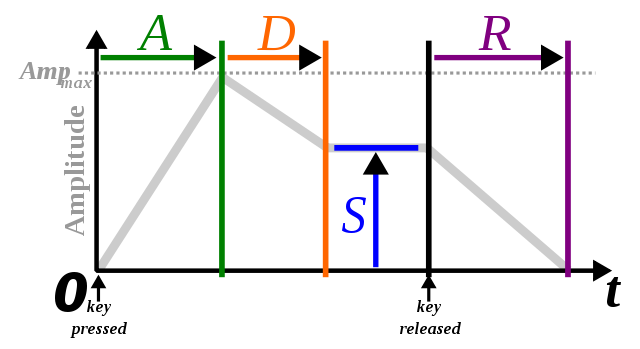

In [103]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/ADSR_parameter.svg/640px-ADSR_parameter.svg.png")

### Timbre: Spectral Indicators

Another property used to characterize timbre is the existence of partials and their relative strengths. **Partials** are the dominant frequencies in a musical tone with the lowest partial being the **fundamental frequency**.

The partials of a sound are visualized with a **spectrogram**. A spectrogram shows the intensity of frequency components over time. (See [Fourier Transform](fourier_transform.html) and [Short-Time Fourier Transform](stft.html) for more.)

### Pure Tone

Let's synthesize a pure tone at 1047 Hz, concert C6:

In [133]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

Display the spectrum of the pure tone:

Text(0.5, 0, 'Frequency (Hz)')

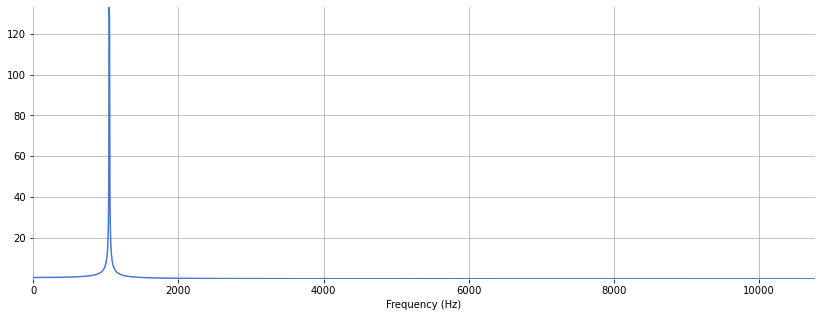

In [138]:
X = sp.fft.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

### Oboe

Let's listen to an oboe playing a C6:

In [139]:
x, sr = librosa.load('audio/oboe_c6.wav')
ipd.Audio(x, rate=sr)

In [140]:
print(x.shape)

(23625,)


Display the spectrum of the oboe:

Text(0.5, 0, 'Frequency (Hz)')

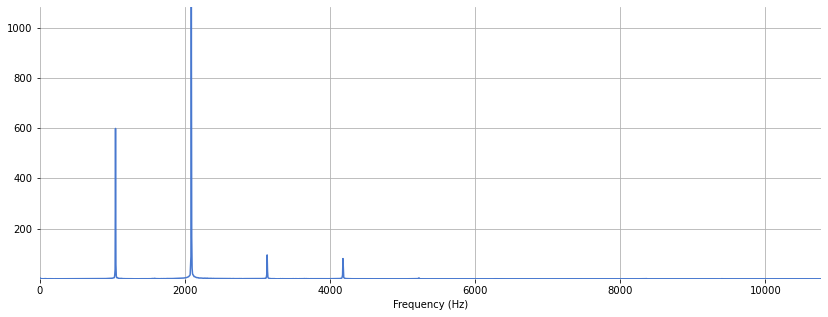

In [142]:
X = sp.fft.fft(x[10000:14096])
X_mag = np.absolute(X)
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

### Clarinet

Let's listen to a clarinet playing a concert C6:

In [143]:
x, sr = librosa.load('audio/clarinet_c6.wav')
ipd.Audio(x, rate=sr)

In [144]:
print(x.shape)

(51386,)


Text(0.5, 0, 'Frequency (Hz)')

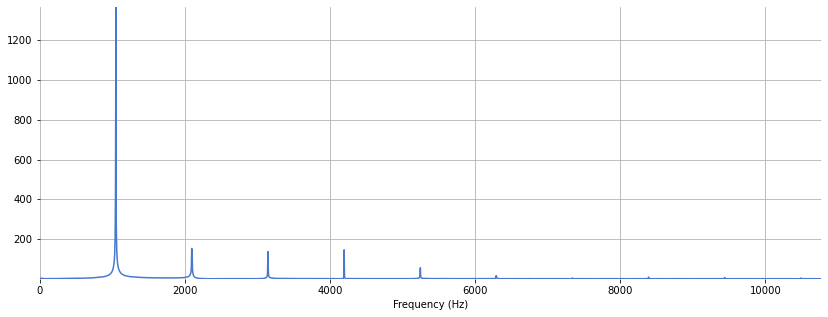

In [146]:
X = sp.fft.fft(x[10000:14096])
X_mag = np.absolute(X)
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Notice the difference in the relative amplitudes of the partial components. All three signals have approximately the same pitch and fundamental frequency, yet their timbres differ.

REFERENCES:Geoffroy Peeters https://perso.telecom-paristech.fr/gpeeters/